In [35]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [36]:
mnist=tf.keras.datasets.mnist
(x_train,y_train), (x_test, y_test) = mnist.load_data()





In [37]:
rows,cols=28,28
x_train=x_train.reshape(x_train.shape[0],rows,cols,1)
x_test=x_test.reshape(x_test.shape[0],rows,cols,1)

input_shape=(rows,cols,1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train=x_train/255.0
x_test=x_test/255.0

#one-hot encoding
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

In [38]:
def build_Lenet (input_shape):
    # sequentail API
    model = tf.keras.Sequential()
# Convolution #1. Filters as we know, is 6. Filter size is 5 x 5, tanh is the activation function. 28 x 28 is the dimension.
    model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), strides=(1,1),activation='tanh',input_shape=input_shape))
    #model.add(tf.keras.layers.Conv2D(filters=6,kernel _size=(5,5), strides=(1, 1), activation='tanh', input_shape=input_shape))
# SubSampling #1. Input = 28x28x6. Output = 14x14x6. SubSampling is simply Average Pooling so we use avg_pool
    model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2),strides=(2, 2)))
# Convolution #2. Input = 14x14x6. Output = 10x10x16 conv2d
    model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=(5, 5), strides=(1, 1), activation='tanh'))
# SubSampLing #2. Input = 28×28x6. Output = 14x14x6. SubSampling is simply Average Pooling so we use avg_pool
    model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(tf.keras.layers.Flatten())
# We must flatten for the further steps to happen.
# It is the process of converting all the resultant 2D arrays as single long continuous Linear vector
    model.add(tf.keras. layers.Dense(units=120, activation='tanh'))
#Fully Connected #1. Input = 5x5x16. Output = 120
    model.add(tf.keras.layers.Flatten())
# Flattening here. It is the process of converting all the resultant 2D arrays as single long continuous Linear
    model.add(tf.keras.layers.Dense(units=84, activation='tanh'))
#FulLy Connected #2. Input = 120. Output = 84
# output Layer
    model.add(tf.keras.layers.Dense (units=10, activation='softmax'))
# Final, output and activation through softmax.
    model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.SGD(lr=0.1, momentum=0.0, decay=0.0),metrics=['accuracy'])
# Arguments passed are like the past, nothing to worry!! :)
    return model
    



In [41]:
lenet = build_Lenet(input_shape)
# We built it!
# number of epochs
epochs = 10
# Can we train the model?



In [43]:
history=lenet.fit(x_train,y_train,epochs=epochs,batch_size=128,verbose=1)
#history = lenet.fit(x_train, y_train,epochs=epochs,batch _size=128, verbose=1)
loss, acc = lenet.evaluate(x_test, y_test)
print ('ACCURACY:',acc)
# Here is the most important thing to be Learnt!
# Epochs - What is it? Simple, Epoch is once all the images are processed one time ir
# both forward and backward to the network.
# Epoch number can be determined by the Trail and Error.

Epoch 1/10
469/469 [==============================] - 10s 20ms/step - loss: 0.0348 - accuracy: 0.9896
Epoch 2/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0323 - accuracy: 0.9900
Epoch 3/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0299 - accuracy: 0.9909
Epoch 4/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0280 - accuracy: 0.9914
Epoch 5/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0258 - accuracy: 0.9922
Epoch 6/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0243 - accuracy: 0.9931
Epoch 7/10
469/469 [==============================] - 11s 24ms/step - loss: 0.0227 - accuracy: 0.9935
Epoch 8/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0209 - accuracy: 0.9942
Epoch 9/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0200 - accuracy: 0.9944
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0389 

Training Data (60000, 28, 28) (60000, 10)
Training Data (10000, 28, 28) (10000, 10)
1/1 [==============================] - 0s 19ms/step
6


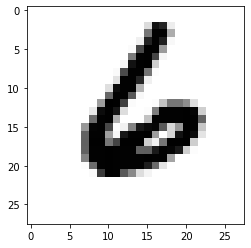

In [47]:
#Transformation / Reshape into 28x 28 pixel
x_train=x_train.reshape(x_train.shape[0], 28,28)
print("Training Data",x_train.shape,y_train.shape)

x_test=x_test.reshape(x_test.shape[0], 28,28)
print("Training Data",x_test.shape,y_test.shape)
#to visualize a single image at the index 8888 (6 is in the dataset)
image_index = 8888
plt.imshow(x_test[image_index].reshape (28, 28),cmap='Greys')
#To predict the output using the Lenet model built
pred = lenet.predict(x_test[image_index].reshape(1, rows, cols, 1))
print(pred.argmax ())
#Example 2 image @index 4444 (9 is the number in the dataset)
#image_index = 4444
#plt.imshow(x_test[image_index].reshape (28, 28), cmap= 'Greys')
#pred = lenet.predict(x_test[image_index].reshape(1, rows, cols, 1))
#print (pred.argmax ())